<a href="https://colab.research.google.com/github/alexpin/Curso-Python/blob/master/inferencial/Clase_16_17_Tipos_de_pruebas_de_hip%C3%B3tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importamos las librerías necesarias para el análisis

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import scipy.stats as st
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

#### De nuevo, usaremos la base de datos Iris

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv(url, names=names)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Tipos de pruebas:

### a) Distribución t de Student

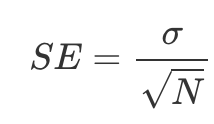

In [ ]:
se_length=iris.std()['sepal-length']/np.sqrt(10)
se_width=iris.std()['sepal-width']/np.sqrt(10)

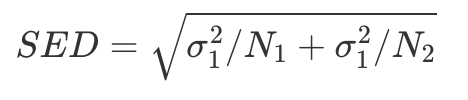

In [ ]:
sed=np.sqrt((se_length**2) + (se_width**2))

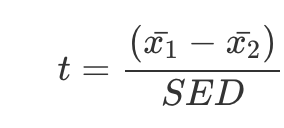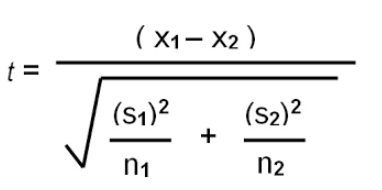

In [ ]:
t_stat=(iris.mean()['sepal-length'] - iris.mean()['sepal-width'])/sed
t_stat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


9.43669373889032

In [ ]:
p = ttest_ind(iris['sepal-length'], iris['sepal-width'])
p

Ttest_indResult(statistic=36.548157693982006, pvalue=3.987838114848222e-112)

El valor absoluto del valor t es mayor que el valor crítico, entonces rechazamos la hipótesis nula

### b) Correlación y coeficiente de Pearson

In [ ]:
# Estudiamos la correlación entre length y width
iris['sepal-length'].corr(iris['sepal-width'])

-0.10936924995064937

In [ ]:
# A continuación, estudiamos la correlación de Pearson entre ambas variables
st.pearsonr(iris['sepal-length'], iris['sepal-width'])

(-0.10936924995064937, 0.1827652152713699)

Correlación débil o inexistente

### c) Análisis de la varianza (ANOVA)

In [ ]:
f_oneway(iris['sepal-length'], iris['sepal-width'])

F_onewayResult(statistic=1335.7678308241748, pvalue=3.9878381148486907e-112)

F Test es 1,335.76 y su pvalue correspondiente es 3.98e-112. Dado que es un número inferior a 0.05 rechazamos la hipótesis nula de que las medias entre variables son similares y concluimos que sí hay diferencias